**COLLECTING AND PREPROCESSING DATA**
_____________________________________________________________________________

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# LOAD LIBRARY
# Import Library
import os
import warnings
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
from datetime import datetime, timedelta
import matplotlib.dates as mdates
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import norm
from scipy.stats import kstest, norm
from scipy.stats import zscore

# Matikan Warning (Opsional)
warnings.filterwarnings("ignore")

# Sklearn untuk preprocessing dan evaluasi model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# TensorFlow dan Keras untuk membangun model LSTM
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.losses import Huber
import joblib
import time

In [4]:
# READ DATA
data = pd.read_csv("/content/drive/MyDrive/indofood.csv")
data

,Date,Close,High,Low,Open,Volume
0,1/4/2021,5791.897461,5855.544686,5749.465978,5813.113203,6655300
1,1/5/2021,5813.113281,5876.760507,5791.897539,5791.897539,14953600
2,1/6/2021,5728.250488,5834.329201,5685.819003,5813.113458,13331700
3,1/7/2021,5749.465820,5791.897302,5728.250079,5728.250079,7031400
4,1/8/2021,5770.682129,5791.897872,5728.250643,5749.466386,12862000
...,...,...,...,...,...,...
1037,4/23/2025,7350.000000,7425.000000,7225.000000,7225.000000,9914800
1038,4/24/2025,7250.000000,7325.000000,7150.000000,7300.000000,6334700
1039,4/25/2025,7475.000000,7475.000000,7275.000000,7275.000000,5156600
1040,4/28/2025,7425.000000,7500.000000,7350.000000,7475.000000,2930700


In [5]:
# DATA INFORMATION
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1042 non-null   object 
 1   Close   1042 non-null   float64
 2   High    1042 non-null   float64
 3   Low     1042 non-null   float64
 4   Open    1042 non-null   float64
 5   Volume  1042 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 49.0+ KB


In [6]:
# STATISTICS DESCRIPTIVE
data.describe()

,Close,High,Low,Open,Volume
count,1042.000000,1042.000000,1042.000000,1042.000000,1.042000e+03
mean,6158.491960,6219.884366,6094.685592,6162.111546,9.034795e+06
std,682.346978,688.871167,664.971298,677.368054,4.927533e+06
min,5070.562500,5134.209728,4879.620964,4879.620964,1.596500e+06
25%,5664.603516,5719.212433,5608.374981,5671.101238,5.694150e+06
50%,6051.704590,6100.000000,5982.410436,6051.704695,7.872500e+06
75%,6444.372559,6507.161227,6375.078195,6444.372892,1.102090e+07
max,8200.000000,8300.000000,8075.000000,8200.000000,3.562910e+07


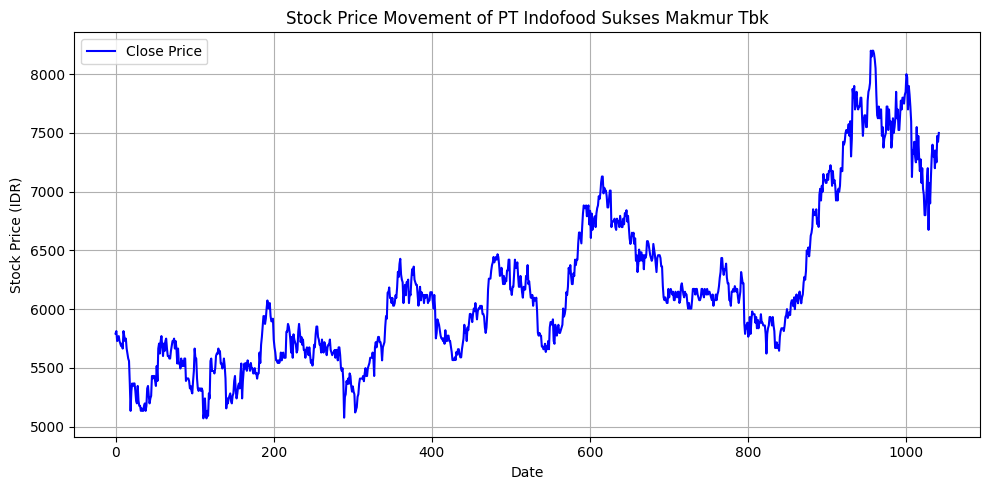

In [7]:
# STOCKS PRICE MOVEMENT
plt.figure(figsize=(10, 5))
plt.plot(data["Close"], color="blue", label="Close Price")
plt.title("Stock Price Movement of PT Indofood Sukses Makmur Tbk")
plt.xlabel("Date")
plt.ylabel("Stock Price (IDR)")
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

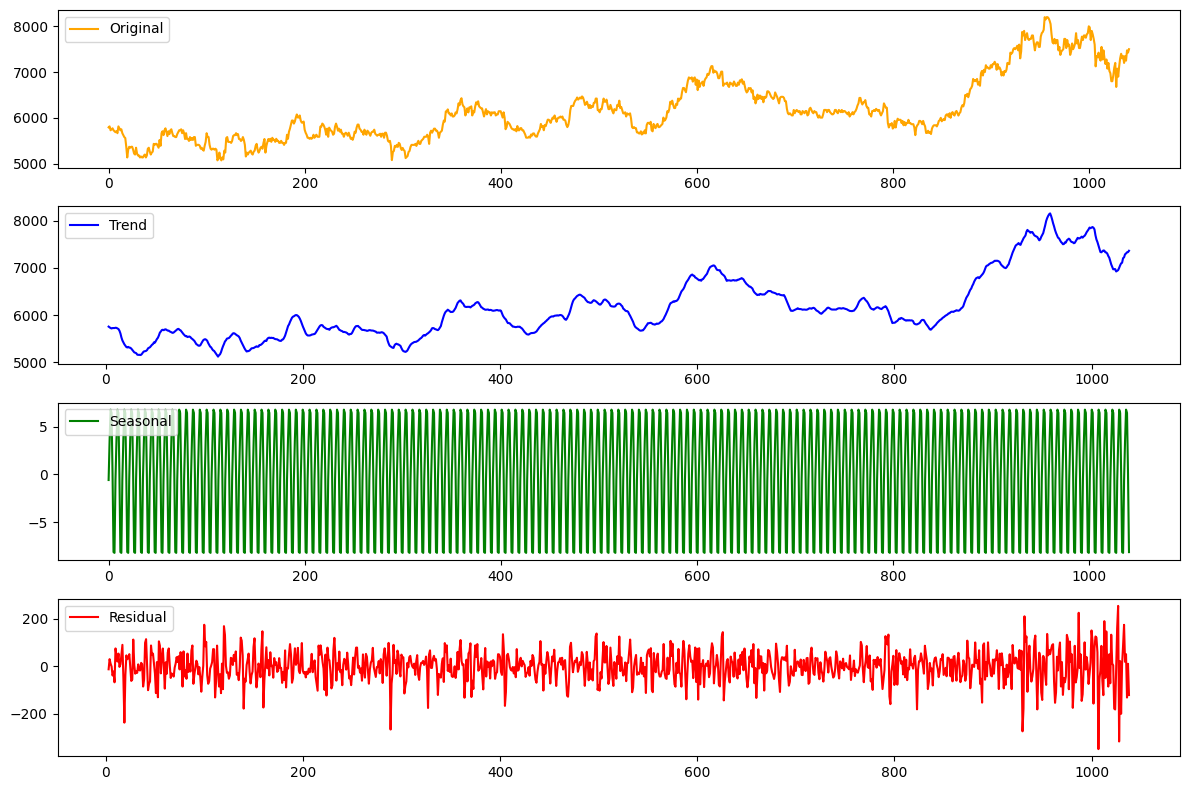

In [8]:
# DECOMPOSITION PLOT

data_values = data["Close"]
decomposition = seasonal_decompose(data_values, model="additive", period=7)

# Ambil komponen-komponennya
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot hasil dekomposisi
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(data_values, label="Original", color="orange")
plt.legend(loc="upper left")

plt.subplot(412)
plt.plot(trend, label="Trend", color="blue")
plt.legend(loc="upper left")

plt.subplot(413)
plt.plot(seasonal, label="Seasonal", color="green")
plt.legend(loc="upper left")

plt.subplot(414)
plt.plot(residual, label="Residual", color="red")
plt.legend(loc="upper left")

plt.tight_layout()
plt.show()

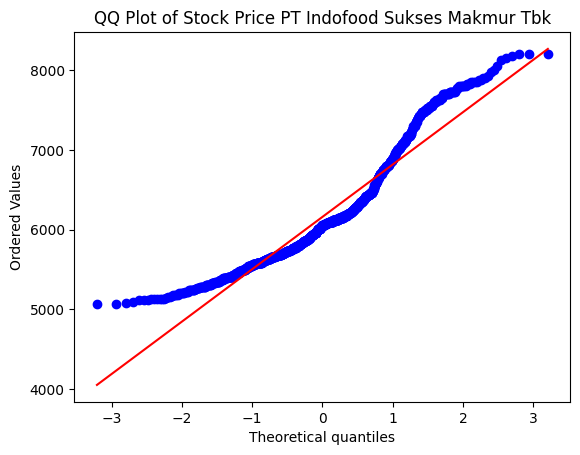

In [9]:
# QQ PLOT
stats.probplot(data["Close"], dist="norm", plot=plt)
plt.title("QQ Plot of Stock Price PT Indofood Sukses Makmur Tbk")
plt.show()

In [10]:
# HANDLE MISSING VALUES
missing_values = data.isnull().sum()
missing_values

,0
Date,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [11]:
# HANDLE DUPLICATE DATA
duplicates = data.duplicated(keep=False)
print("Jumlah data duplikat:", duplicates.sum())

Jumlah data duplikat: 0


In [12]:
# ADJUST DATA TYPE
data["Date"] = pd.to_datetime(data["Date"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1042 non-null   datetime64[ns]
 1   Close   1042 non-null   float64       
 2   High    1042 non-null   float64       
 3   Low     1042 non-null   float64       
 4   Open    1042 non-null   float64       
 5   Volume  1042 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 49.0 KB


In [13]:
#HANDLE OUTLIERS

# Hitung z-score untuk setiap kolom numerik
z_scores = np.abs(zscore(data.select_dtypes(include=[np.number])))

# Tetapkan threshold z-score (misalnya 3.0)
threshold = 3.0

# Identifikasi baris yang memiliki outlier
outliers = (z_scores > threshold).any(axis=1)

# Cetak jumlah data outlier
print("Jumlah data outlier:", outliers.sum())

# Hitung mean dari data, tetapi hanya untuk kolom numerik
mean_value = data.select_dtypes(include=np.number).mean()

# Menangani outlier: Ganti outlier dengan mean kolom masing-masing
for column in data.select_dtypes(include=np.number).columns:
    data[column] = np.where(outliers, mean_value[column], data[column])

# Buat DataFrame
df_data = pd.DataFrame(data)

# Menampilkan hasil
print("Data Setelah Penanganan Outlier (Diganti dengan Mean):")
df_data

Jumlah data outlier: 25
Data Setelah Penanganan Outlier (Diganti dengan Mean):


,Date,Close,High,Low,Open,Volume
0,2021-01-04,5791.897461,5855.544686,5749.465978,5813.113203,6655300.0
1,2021-01-05,5813.113281,5876.760507,5791.897539,5791.897539,14953600.0
2,2021-01-06,5728.250488,5834.329201,5685.819003,5813.113458,13331700.0
3,2021-01-07,5749.465820,5791.897302,5728.250079,5728.250079,7031400.0
4,2021-01-08,5770.682129,5791.897872,5728.250643,5749.466386,12862000.0
...,...,...,...,...,...,...
1037,2025-04-23,7350.000000,7425.000000,7225.000000,7225.000000,9914800.0
1038,2025-04-24,7250.000000,7325.000000,7150.000000,7300.000000,6334700.0
1039,2025-04-25,7475.000000,7475.000000,7275.000000,7275.000000,5156600.0
1040,2025-04-28,7425.000000,7500.000000,7350.000000,7475.000000,2930700.0


In [14]:
# FEATURE SELECTION

data = data.drop(columns=["Open", "High", "Low", "Volume"])
data

,Date,Close
0,2021-01-04,5791.897461
1,2021-01-05,5813.113281
2,2021-01-06,5728.250488
3,2021-01-07,5749.465820
4,2021-01-08,5770.682129
...,...,...
1037,2025-04-23,7350.000000
1038,2025-04-24,7250.000000
1039,2025-04-25,7475.000000
1040,2025-04-28,7425.000000


**MODEL CONSTRUCTION**
________________________________________________________________________________

In [15]:
# CALCULATE INTERCEPT AND SLOPE VALUE
y = data["Close"].values
t = np.arange(1, len(y) + 1)  # t_i: waktu pengamatan ke-i

# Hitung rata-rata t dan y
t_mean = np.mean(t)
y_mean = np.mean(y)

# Hitung slope (β₁)
numerator = np.sum((t - t_mean) * (y - y_mean))
denominator = np.sum((t - t_mean) ** 2)
slope = numerator / denominator

# Hitung intercept (β₀)
intercept = y_mean - slope * t_mean

# Cetak hasil
print("Slope (β₁):", slope)
print("Intercept (β₀):", intercept)

Slope (β₁): 1.7128043019420467
Intercept (β₀): 5259.7464697192445


In [16]:
# CALCULATE TREND VALUE & RELATIVE TREND VALUE
Ut = intercept + slope * t
Vt = y / Ut * 100

df_utvt = pd.DataFrame({"Waktu": t, "Trend Value": Ut, "Relative Trend Value": Vt})
df_utvt

,Waktu,Trend Value,Relative Trend Value
0,1,5261.459274,110.081579
1,2,5263.172078,110.448855
2,3,5264.884883,108.801059
3,4,5266.597687,109.168502
4,5,5268.310491,109.535726
...,...,...,...
1037,1038,7037.637335,104.438459
1038,1039,7039.350139,102.992462
1039,1040,7041.062944,106.162948
1040,1041,7042.775748,105.427182


In [17]:
# DEFINE MEDIAN FOR RELATIVE TREND VALUE DATA
medianv = np.median(Vt)
P = Vt[Vt <= medianv]
Q = Vt[Vt > medianv]

In [18]:
df_P = pd.DataFrame({"Relative Trend Value P": P})
df_Q = pd.DataFrame({"Relative Trend Value Q": Q})

df_P

,Relative Trend Value P
0,98.361854
1,97.930404
2,98.266690
3,97.436367
4,97.404965
...,...
516,96.953686
517,96.930014
518,98.687721
519,95.055381


In [19]:
df_Q

,Relative Trend Value Q
0,110.081579
1,110.448855
2,108.801059
3,109.168502
4,109.535726
...,...
516,104.438459
517,102.992462
518,106.162948
519,105.427182


In [21]:
# CALCULATING FIRST DIFFERENCE
Pd = np.abs(np.diff(P))
Qd= np.abs(np.diff(Q))

df_PdQd = pd.DataFrame({"Perbedaan Pd": Pd, "Perbedaan Qd": Qd})
df_PdQd

,Perbedaan Pd,Perbedaan Qd
0,0.431450,0.367275
1,0.336287,1.647796
2,0.830323,0.367444
3,0.031402,0.367223
4,0.829547,0.840751
...,...,...
515,2.519424,2.106492
516,0.023671,1.445997
517,1.757707,3.170486
518,3.632340,0.735766


In [22]:
# MEAN FIRST DIFFERENCE
Pv = Pd.mean()
Qv = Qd.mean()

print("Rata - Rata Perbedaan Pertama (Pv):", Pv)
print("Rata - Rata Perbedaan Pertama (Qv):", Qv)

Rata - Rata Perbedaan Pertama (Pv): 0.8622285485802726
Rata - Rata Perbedaan Pertama (Qv): 1.3649774327245565


In [23]:
# DEFINE DECISION FACTOR
# Menghitung e
e = Pv / Qv

# Menghitung floor(e)
e_floor = math.floor(e)

# Menghitung ϑ
ϑ = 10 ** e_floor * (Pv / Qv)
print("Faktor Pengambilan Keputusan :", ϑ)

Faktor Pengambilan Keputusan : 0.6316797097950737


In [24]:
# DEFINE NUMBER OF INTERVAL
# Menghitung min dan max dari V
min_V = np.min(data["Close"])
max_V = np.max(data["Close"])
l_t = 1.0

# Menentukan n dengan menggunakan Sturges' Rule
N = len(data["Close"])
n = int(1 + np.log2(N))

# Menghitung jumlah interval output fuzzy k
k = ((min_V - ϑ) / (max_V + ϑ)) + (l_t * n)

print("Jumlah interval output fuzzy k:", k)

Jumlah interval output fuzzy k: 11.618236621068393


In [28]:
# UNIVERSE OF DISCOURSE
data_min = np.min(data["Close"])
data_max = np.max(data["Close"])
delta = np.std(data["Close"])

# Menghitung UOD
UOD = (data_min - delta, data_max + delta)

print(f"Minimum value (min(y)): {data_min}")
print(f"Maximum value (max(y)): {data_max}")
print(f"Standard deviation (δ): {delta}")
print(f"Universe of Discourse (UOD): {UOD}")

Minimum value (min(y)): 5070.5625
Maximum value (max(y)): 8200.0
Standard deviation (δ): 660.9524028997326
Universe of Discourse (UOD): (4409.610097100267, 8860.952402899733)


In [29]:
# SPLIT UOD

Umin = data_min - delta
Umax = data_max + delta
theta = ϑ
boundaries = np.linspace(Umin - theta, Umax + theta, int(k) + 1)
intervals = [(boundaries[i], boundaries[i+1]) for i in range(int(k))]
midpoints = [(l + u) / 2 for l, u in intervals]

# Membuat data untuk tabel
table_data = []
for i, ((l, u), m) in enumerate(zip(intervals, midpoints), start=1):
    table_data.append([f"Interval {i}", f"[{l:.2f}, {u:.2f}]", f"{m:.2f}"])

# Menampilkan dalam format tabel
from tabulate import tabulate
headers = ["No", "Range", "Midpoint"]
print(tabulate(table_data, headers=headers, tablefmt="github"))

| No          | Range              |   Midpoint |
|-------------|--------------------|------------|
| Interval 1  | [4408.98, 4813.76] |    4611.37 |
| Interval 2  | [4813.76, 5218.54] |    5016.15 |
| Interval 3  | [5218.54, 5623.33] |    5420.93 |
| Interval 4  | [5623.33, 6028.11] |    5825.72 |
| Interval 5  | [6028.11, 6432.89] |    6230.5  |
| Interval 6  | [6432.89, 6837.67] |    6635.28 |
| Interval 7  | [6837.67, 7242.45] |    7040.06 |
| Interval 8  | [7242.45, 7647.24] |    7444.85 |
| Interval 9  | [7647.24, 8052.02] |    7849.63 |
| Interval 10 | [8052.02, 8456.80] |    8254.41 |
| Interval 11 | [8456.80, 8861.58] |    8659.19 |


In [30]:
# FUZZIFICATION
def fuzzify(val):
    for i, (low, high) in enumerate(intervals):
        if low <= val <= high:
            return i + 1
    return None

fuzzified_series = [fuzzify(val) for val in y]

df_fuzzified = pd.DataFrame({"Waktu": t, "Close": y, "Fuzzified": fuzzified_series})
df_fuzzified

,Waktu,Close,Fuzzified
0,1,5791.897461,4
1,2,5813.113281,4
2,3,5728.250488,4
3,4,5749.465820,4
4,5,5770.682129,4
...,...,...,...
1037,1038,7350.000000,8
1038,1039,7250.000000,8
1039,1040,7475.000000,8
1040,1041,7425.000000,8


In [31]:
# FUZZY LOGICAL RELATIONSHIP

X_fuzzy = []
y_fuzzy = []
for i in range(1, len(fuzzified_series)):
    X_fuzzy.append(fuzzified_series[i - 1])
    y_fuzzy.append(fuzzified_series[i])

df_flr = pd.DataFrame({"Antecedent": X_fuzzy, "Consequent": y_fuzzy})
df_flr

,Antecedent,Consequent
0,4,4
1,4,4
2,4,4
3,4,4
4,4,4
...,...,...
1036,7,8
1037,8,8
1038,8,8
1039,8,8



Autocorrelation Values:
+------+-----------+
| Lag  | ACF Value |
+------+-----------+
| 0.0  |    1.0    |
| 1.0  |  0.9372   |
| 2.0  |  0.9264   |
| 3.0  |  0.9143   |
| 4.0  |  0.8954   |
| 5.0  |  0.8942   |
| 6.0  |  0.8888   |
| 7.0  |  0.8877   |
| 8.0  |  0.8766   |
| 9.0  |  0.8694   |
| 10.0 |  0.8664   |
| 11.0 |  0.8571   |
| 12.0 |  0.8553   |
| 13.0 |  0.8527   |
| 14.0 |  0.8449   |
| 15.0 |  0.8371   |
| 16.0 |  0.8311   |
| 17.0 |  0.8268   |
| 18.0 |  0.8152   |
| 19.0 |  0.8098   |
| 20.0 |  0.8052   |
| 21.0 |  0.8031   |
| 22.0 |  0.7924   |
| 23.0 |   0.786   |
| 24.0 |  0.7849   |
| 25.0 |   0.78    |
| 26.0 |  0.7732   |
| 27.0 |   0.771   |
| 28.0 |  0.7582   |
| 29.0 |  0.7521   |
| 30.0 |  0.7436   |
+------+-----------+
Best lag to use: 1


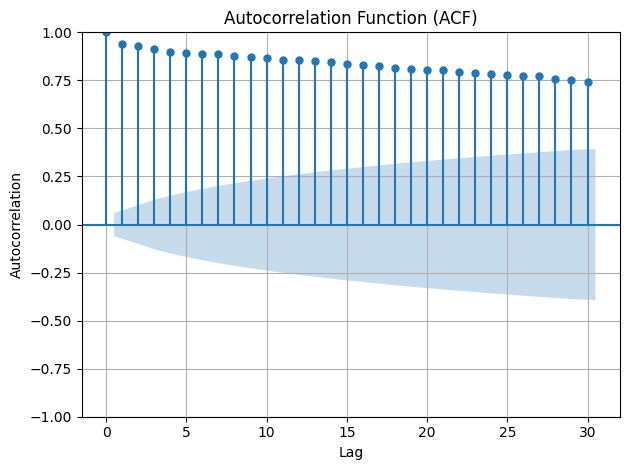

In [32]:
# Ambil data Consequent
data = df_flr["Consequent"].values
lag_limit = 30

# Hitung ACF
acf_values = acf(data, nlags=lag_limit)

# Buat DataFrame hasil ACF
acf_df = pd.DataFrame({
    "Lag": np.arange(len(acf_values)),
    "ACF Value": np.round(acf_values, 4)
})

# Tampilkan tabel ACF secara rapi
print("\nAutocorrelation Values:")
print(tabulate(acf_df, headers="keys", tablefmt="pretty", showindex=False))

# Tentukan lag optimal (selain lag 0) yang ACF-nya > 0.5
optimal_lags = acf_df[(acf_df["ACF Value"] > 0.5) & (acf_df["Lag"] != 0)]["Lag"].tolist()

# Tentukan best lag (lag terkecil dari hasil optimal_lags)
best_lag = optimal_lags[0] if optimal_lags else None
print("Best lag to use:", best_lag)

# Plot ACF
plot_acf(data, lags=lag_limit)
plt.title("Autocorrelation Function (ACF)")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.grid(True)
plt.tight_layout()
plt.show()


Training window size: 1
Epoch 1/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.0771 - val_loss: 0.0138 - learning_rate: 0.0010
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0138 - val_loss: 0.0054 - learning_rate: 0.0010
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0112 - val_loss: 0.0026 - learning_rate: 0.0010
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073 - val_loss: 0.0020 - learning_rate: 0.0010
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - val_loss: 0.0017 - learning_rate: 0.0010
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - val_loss: 0.0018 - learning_rate: 0.0010
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0037 - val_loss: 0.0021 - learning_rate: 0.0010
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - val_loss: 0.0017 - learning_rate: 0.0010
Epoch 9/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0045 - val_loss: 0.0018 - learning_rate: 5.0000e-0

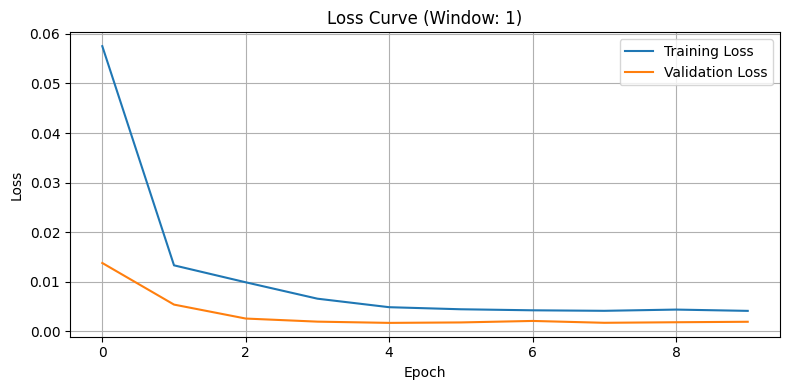


Training window size: 2
Epoch 1/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0637 - val_loss: 0.0032 - learning_rate: 0.0010
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0108 - val_loss: 0.0026 - learning_rate: 0.0010
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0048 - val_loss: 0.0019 - learning_rate: 0.0010
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - val_loss: 0.0019 - learning_rate: 0.0010
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - val_loss: 0.0017 - learning_rate: 0.0010
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - val_loss: 0.0020 - learning_rate: 0.0010
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0039 - val_loss: 0.0019 - learning_rate: 0.0010
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0041 - val_loss: 0.0022 - learning_rate: 0.0010
Epoch 9/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0034 - val_loss: 0.0017 - learning_rate: 5.0000e-

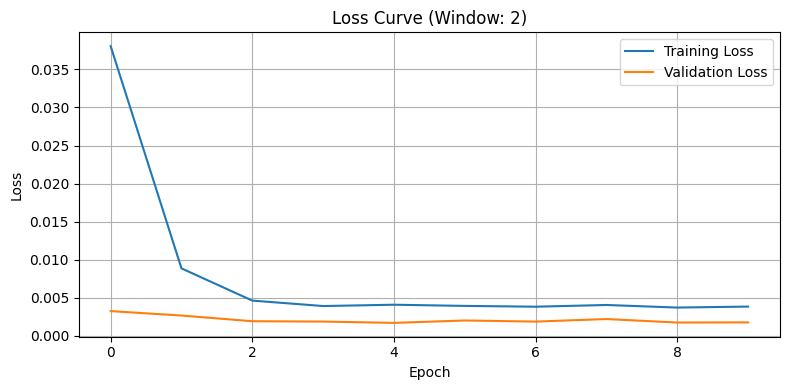


Training window size: 3
Epoch 1/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0681 - val_loss: 0.0060 - learning_rate: 0.0010
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0091 - val_loss: 0.0021 - learning_rate: 0.0010
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0043 - val_loss: 0.0019 - learning_rate: 0.0010
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0042 - val_loss: 0.0024 - learning_rate: 0.0010
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0042 - val_loss: 0.0017 - learning_rate: 0.0010
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0041 - val_loss: 0.0016 - learning_rate: 0.0010
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0042 - val_loss: 0.0019 - learning_rate: 0.0010
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0039 - val_loss: 0.0017 - learning_rate: 0.0010
Epoch 9/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0045 - val_loss: 0.0016 - learning_rate: 5.000

1/5 ━━━━━━━━━━━━━━━━━━━━ 1s 279ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step
RMSE (window 3): 0.153626


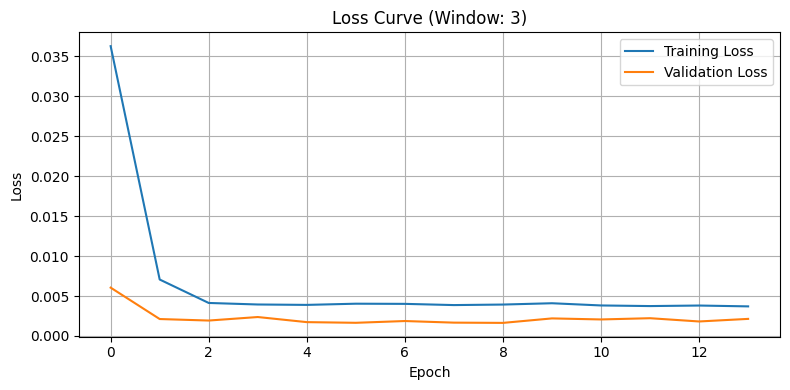


Training window size: 4
Epoch 1/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0532 - val_loss: 0.0028 - learning_rate: 0.0010
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0050 - val_loss: 0.0019 - learning_rate: 0.0010
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0037 - val_loss: 0.0026 - learning_rate: 0.0010
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0038 - val_loss: 0.0021 - learning_rate: 0.0010
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0035 - val_loss: 0.0017 - learning_rate: 0.0010
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0046 - val_loss: 0.0026 - learning_rate: 0.0010
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0042 - val_loss: 0.0028 - learning_rate: 0.0010
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0037 - val_loss: 0.0019 - learning_rate: 0.0010
Epoch 9/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0041 - val_loss: 0.0018 - learning_rate: 5.000

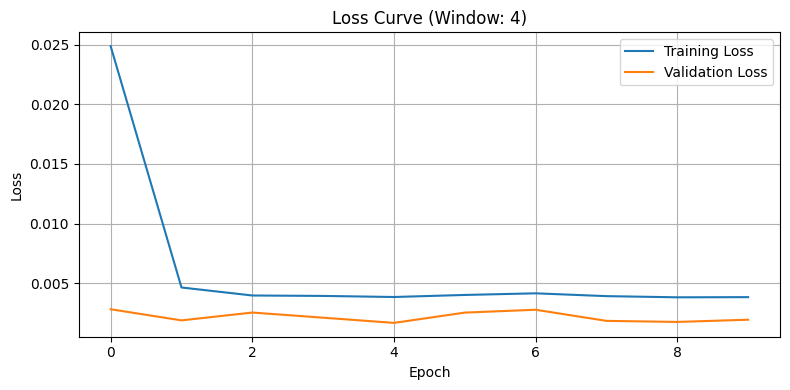


Training window size: 5
Epoch 1/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0471 - val_loss: 0.0029 - learning_rate: 0.0010
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0056 - val_loss: 0.0028 - learning_rate: 0.0010
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0042 - val_loss: 0.0025 - learning_rate: 0.0010
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0038 - val_loss: 0.0018 - learning_rate: 0.0010
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0043 - val_loss: 0.0037 - learning_rate: 0.0010
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0043 - val_loss: 0.0018 - learning_rate: 0.0010
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0042 - val_loss: 0.0018 - learning_rate: 0.0010
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0039 - val_loss: 0.0018 - learning_rate: 5.0000e-04
Epoch 9/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0037 - val_loss: 0.0018 - learning_rate: 5.000

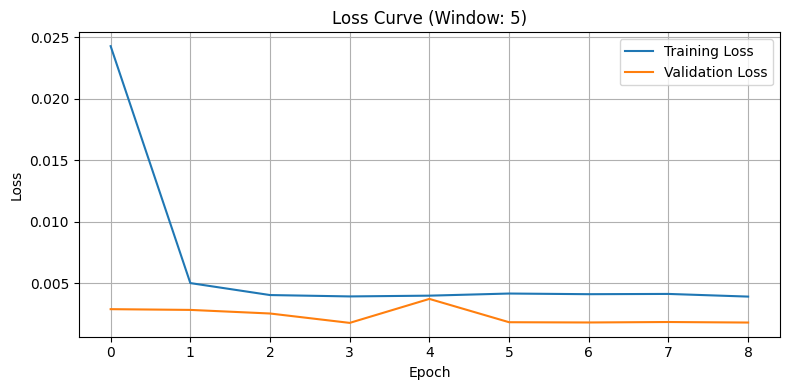


Training window size: 6
Epoch 1/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0343 - val_loss: 0.0021 - learning_rate: 0.0010
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0045 - val_loss: 0.0024 - learning_rate: 0.0010
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0043 - val_loss: 0.0023 - learning_rate: 0.0010
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0041 - val_loss: 0.0020 - learning_rate: 0.0010
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0041 - val_loss: 0.0019 - learning_rate: 5.0000e-04
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0036 - val_loss: 0.0035 - learning_rate: 5.0000e-04
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0043 - val_loss: 0.0018 - learning_rate: 5.0000e-04
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0038 - val_loss: 0.0018 - learning_rate: 5.0000e-04
Epoch 9/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0043 - val_loss: 0.0018 - l

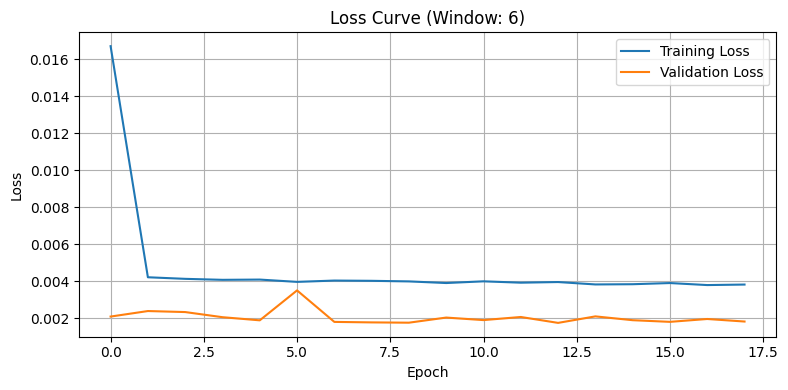


Training window size: 7
Epoch 1/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0464 - val_loss: 0.0023 - learning_rate: 0.0010
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0049 - val_loss: 0.0023 - learning_rate: 0.0010
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0044 - val_loss: 0.0019 - learning_rate: 0.0010
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0037 - val_loss: 0.0022 - learning_rate: 0.0010
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0036 - val_loss: 0.0021 - learning_rate: 0.0010
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0046 - val_loss: 0.0020 - learning_rate: 0.0010
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0042 - val_loss: 0.0019 - learning_rate: 5.0000e-04
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0045 - val_loss: 0.0021 - learning_rate: 5.0000e-04
Epoch 9/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0041 - val_loss: 0.0029 - learning

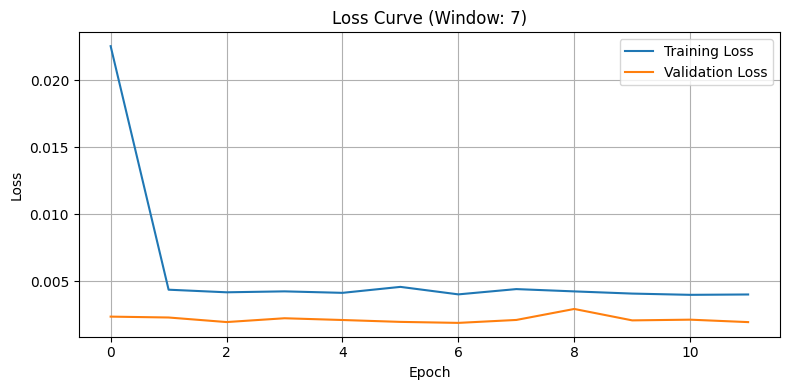


Total waktu training: 87.65 detik

 Best Window Size berdasarkan RMSE: 7


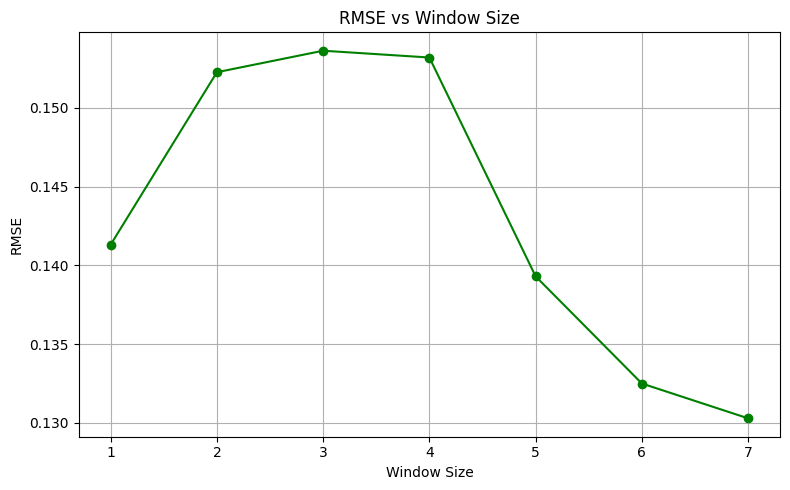

In [33]:
# BUILD AND TRAIN MODEL

# Siapkan Midpoints
X_mid = np.array([midpoints[x-1] for x in X_fuzzy]).reshape(-1, 1)
y_mid = np.array([midpoints[y-1] for y in y_fuzzy]).reshape(-1, 1)

# Normalisasi Data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X_mid)
y_scaled = scaler_y.fit_transform(y_mid)

# Split data
train_size = int(len(X_scaled) * 0.7)
val_size = int(len(X_scaled) * 0.15)

X_train_scaled = X_scaled[:train_size]
y_train_scaled = y_scaled[:train_size]

X_val_scaled = X_scaled[train_size:train_size+val_size]
y_val_scaled = y_scaled[train_size:train_size+val_size]

X_test_scaled = X_scaled[train_size+val_size:]
y_test_scaled = y_scaled[train_size+val_size:]

# Fungsi sliding window
def create_sliding_window(X, y, window_size):
    Xs, ys = [], []
    for i in range(window_size, len(X)):
        Xs.append(X[i-window_size:i])
        ys.append(y[i])
    return np.array(Xs), np.array(ys)

# Inisialisasi
results = []
total_start = time.time()

# Loop window size terbaik
for window_size in range(1, 8):
    print(f"\nTraining window size: {window_size}")
    window_start = time.time()

    X_train_seq, y_train_seq = create_sliding_window(X_train_scaled, y_train_scaled, window_size)
    X_val_seq, y_val_seq = create_sliding_window(X_val_scaled, y_val_scaled, window_size)
    X_test_seq, y_test_seq = create_sliding_window(X_test_scaled, y_test_scaled, window_size)

    # Reshape untuk LSTM
    X_train_seq = X_train_seq.reshape(-1, window_size, 1)
    X_val_seq = X_val_seq.reshape(-1, window_size, 1)
    X_test_seq = X_test_seq.reshape(-1, window_size, 1)

    # Arsitektur LSTM sederhana (akurat & stabil)
    model = Sequential()
    model.add(LSTM(64, return_sequences=True, input_shape=(window_size, 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(32))
    model.add(Dense(1))

    model.compile(optimizer=Adam(learning_rate=0.001), loss="mean_squared_error")

    # Callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-4)

    # Training
    history = model.fit(
        X_train_seq, y_train_seq,
        validation_data=(X_val_seq, y_val_seq),
        epochs=20,
        batch_size=16,
        verbose=1,
        callbacks=[early_stopping, reduce_lr]
    )

    # Evaluasi
    y_pred_scaled = model.predict(X_test_seq)
    rmse = np.sqrt(mean_squared_error(y_test_seq, y_pred_scaled))
    results.append([window_size, rmse])
    print(f"RMSE (window {window_size}): {rmse:.6f}")

    # Plot loss
    plt.figure(figsize=(8, 4))
    plt.plot(history.history["loss"], label="Training Loss")
    if "val_loss" in history.history:
        plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.title(f"Loss Curve (Window: {window_size})")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Waktu total
elapsed_total = time.time() - total_start
print(f"\nTotal waktu training: {elapsed_total:.2f} detik")

# Best window size
best_window = min(results, key=lambda x: x[1])[0]
print(f"\n Best Window Size berdasarkan RMSE: {best_window}")

# Visualisasi RMSE
window_sizes = [r[0] for r in results]
rmses = [r[1] for r in results]

plt.figure(figsize=(8, 5))
plt.plot(window_sizes, rmses, marker="o", color="green")
plt.title("RMSE vs Window Size")
plt.xlabel("Window Size")
plt.ylabel("RMSE")
plt.grid(True)
plt.xticks(window_sizes)
plt.tight_layout()
plt.show()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 7, 64)          │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 7, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 88,037 (343.90 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 58,692 (229.27 KB)

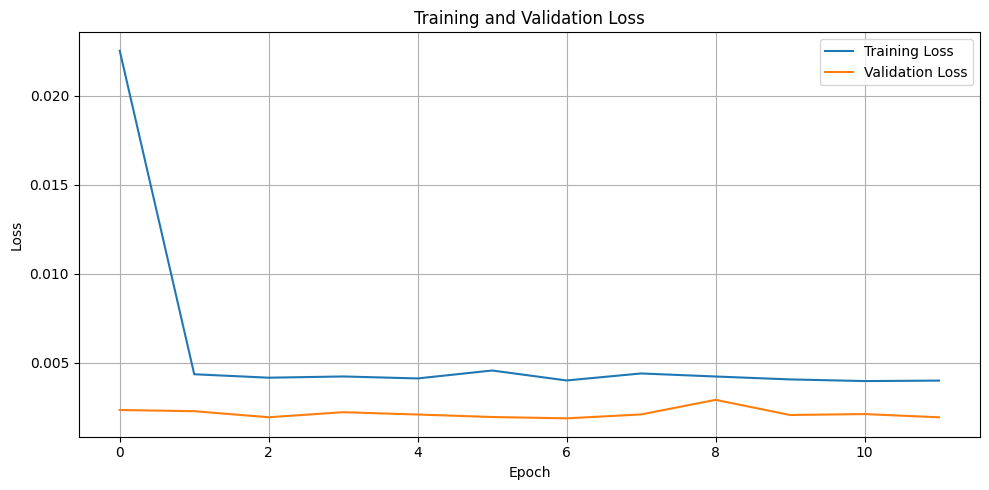

In [34]:
# SUMMARY MODEL
model.summary()

# Visualisasi Model Training & Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [35]:
# SAVE MODEL

best_rmse = float("inf")
best_model = None

for window_size in range(1, 8):
    ...
    if rmse < best_rmse:
        best_rmse = rmse
        best_model = model
        best_model.save("bestlstmmodel.h5")

In [36]:
# GET PREDICTED VALUE
# Prediksi data test dengan model terbaik
f_t_prime_normalized = best_model.predict(X_test_seq)

# Simpan hasil normalized forecasting
df_forecast_normalized = pd.DataFrame({
    "predicted (normalized)": f_t_prime_normalized.flatten(),
    "actual (normalized)": y_test_seq.flatten()
})

# Tampilkan beberapa hasil
print("\nHasil prediksi f′(t) dalam bentuk normalized:")
print(df_forecast_normalized)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

Hasil prediksi f′(t) dalam bentuk normalized:
     predicted (normalized)  actual (normalized)
0                  0.516640                0.625
1                  0.519101                0.625
2                  0.528482                0.625
3                  0.525275                0.625
4                  0.545995                0.625
..                      ...                  ...
145                0.698693                0.750
146                0.711654                0.750
147                0.727599                0.750
148                0.743937                0.750
149                0.741698                0.750

[150 rows x 2 columns]


In [37]:
# DENORMALIZATION

f_t_prime_denormalized = scaler_y.inverse_transform(f_t_prime_normalized.reshape(-1, 1))
y_test_denormalized = scaler_y.inverse_transform(y_test_seq.reshape(-1, 1))

# Buat dataframe hasil
df_denormalized = pd.DataFrame({
    "Actual": y_test_denormalized.flatten(),
    "Predicted": f_t_prime_denormalized.flatten()
})

df_denormalized

,Actual,Predicted
0,7040.063583,6689.166016
1,7040.063583,6697.136230
2,7040.063583,6727.512207
3,7040.063583,6717.126953
4,7040.063583,6784.224609
...,...,...
145,7444.845916,7278.700195
146,7444.845916,7320.670410
147,7444.845916,7372.304199
148,7444.845916,7425.211426


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


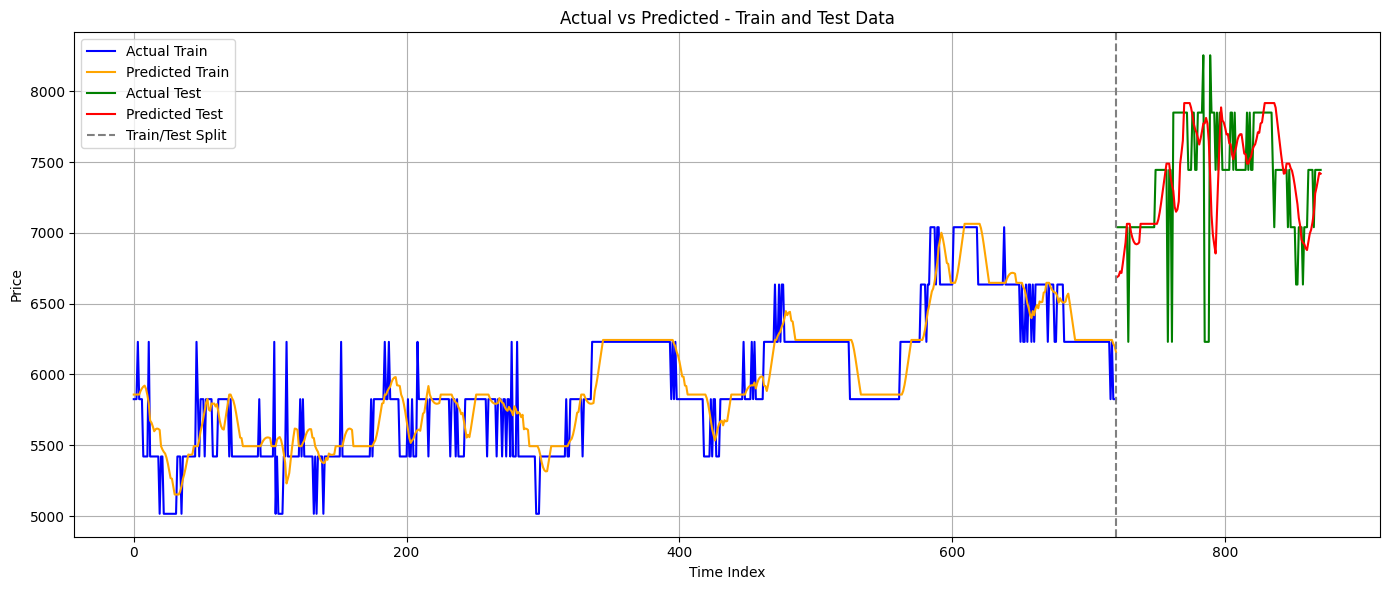

In [38]:
# Buat ulang data sliding window untuk visualisasi
X_train_seq_plot, y_train_seq_plot = create_sliding_window(X_train_scaled, y_train_scaled, best_window)
X_test_seq_plot, y_test_seq_plot = create_sliding_window(X_test_scaled, y_test_scaled, best_window)

# Reshape for LSTM input
X_train_seq_plot = X_train_seq_plot.reshape((X_train_seq_plot.shape[0], X_train_seq_plot.shape[1], 1))
X_test_seq_plot = X_test_seq_plot.reshape((X_test_seq_plot.shape[0], X_test_seq_plot.shape[1], 1))

# Prediksi pada data training dan testing
y_train_pred_scaled = best_model.predict(X_train_seq_plot)
y_test_pred_scaled = best_model.predict(X_test_seq_plot)

# Denormalisasi hasil prediksi dan nilai aktual
y_train_pred_denormalized = scaler_y.inverse_transform(y_train_pred_scaled)
y_train_actual_denormalized = scaler_y.inverse_transform(y_train_seq_plot)

y_test_pred_denormalized = scaler_y.inverse_transform(y_test_pred_scaled)
y_test_actual_denormalized = scaler_y.inverse_transform(y_test_seq_plot)


# Visualisasi Actual vs Predicted (Train dan Test)
plt.figure(figsize=(14, 6))

# Define train_size_plot based on the length of the training data after windowing
train_size_plot = len(y_train_actual_denormalized)


# Plot Actual dan Predicted untuk data Training
plt.plot(range(train_size_plot), y_train_actual_denormalized, label="Actual Train", color="blue")
plt.plot(range(train_size_plot), y_train_pred_denormalized, label="Predicted Train", color="orange")

# Plot Actual dan Predicted untuk data Testing
plt.plot(range(train_size_plot, train_size_plot + len(y_test_actual_denormalized)), y_test_actual_denormalized, label="Actual Test", color="green")
plt.plot(range(train_size_plot, train_size_plot + len(y_test_pred_denormalized)), y_test_pred_denormalized, label="Predicted Test", color="red")

# Garis pemisah antara train dan test
plt.axvline(x=train_size_plot - 1, color="gray", linestyle="--", label="Train/Test Split")

plt.title("Actual vs Predicted - Train and Test Data")
plt.xlabel("Time Index")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [39]:
# Evaluasi Model menggunakan MAPE
mape = mean_absolute_percentage_error(df_denormalized["Actual"], df_denormalized["Predicted"])
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

Mean Absolute Percentage Error (MAPE): 0.03936036807638104%
